In [1]:
from feature_engineering.dao.sussex_huawei_dao import SussexHuaweiDAO
from feature_engineering.preprocessing.sussex_huawei_preprocessor import SussexHuaweiPreprocessor
import matplotlib as plt
import seaborn as sns

In [2]:
dao = SussexHuaweiDAO()
preprocessor = SussexHuaweiPreprocessor()

In [3]:
# 1. Load Data
label_column_names = ['coarse_label', 'fine_label', 'road_label']
labels = dao.read_data(
            '/home/lorenz/PycharmProjects/rctc_pipeline/data_sets/sussex_huawei/User1/220617/Label.txt', #TODO: Pack in config/.env
            column_names=label_column_names, use_columns=[1, 2, 3])
data_column_names = ['acceleration_x', 'acceleration_y', 'acceleration_z', #TODO: Pack in config/.env
                             'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
                             'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
                             'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z',
                             'gravity_x', 'gravity_y', 'gravity_z',
                             'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z',
                             ]
data = dao.read_data(
        '/home/lorenz/PycharmProjects/rctc_pipeline/data_sets/sussex_huawei/User1/220617/Bag_Motion.txt', #TODO: Pack in config/.env
        column_names=data_column_names, use_columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [4]:
# 2. Preprocessing

# 2.1 Label data and remove NaNs
data = preprocessor.label_data(data, labels)
data = preprocessor.remove_nans(data, replacement_mode='del_row')

# 2.2 Normalization
acelerometer_columns = ['acceleration_x', 'acceleration_y', 'acceleration_z']
gravity_columns = ['gravity_x', 'gravity_y', 'gravity_z']
data = preprocessor.project_accelerometer_to_global_coordinates(
            data, 
            mode ='known_gravity', 
            target_columns = acelerometer_columns,
            support_columns = gravity_columns)

data = preprocessor.znormalize_quantitative_data(data, data_column_names)
#data = preprocessor.min_max_normalize_quantitative_data(data, data_column_names)

# 2.3 Segment data
# Coarse Labels
# Null=0, Still=1, Walking=2, Run=3, Bike=4, Car=5, Bus=6, Train=7, Subway=8
# Road label:
# City=1, Motorway=2, Countryside=3, Dirt road=4, Null=0
selected_coarse_labels = [5]
selected_road_labels = [1, 3]
car_segments = preprocessor.segment_data(data, mode='labels', 
                                 label_column='coarse_label', 
                                 support=selected_coarse_labels)

data_segments = []
for car_segment in car_segments:
        road_segments = preprocessor.segment_data(car_segment, mode='labels', 
                                  label_column='road_label',
                                  support=selected_road_labels
                                )
        for road_segment in road_segments:
            data_segments.append(road_segment)

11


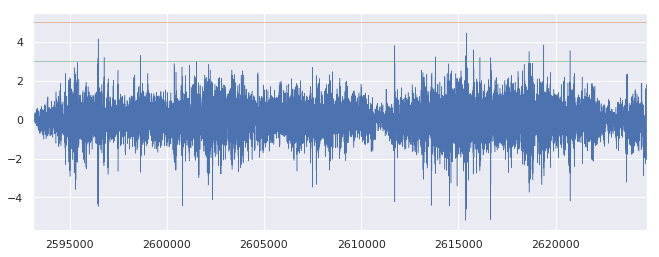

In [13]:
# Visual anlaysis:
sns.set(rc={'figure.figsize':(11, 4)})
data_segments[6]['acceleration_x'].plot(linewidth=0.5);
data_segments[6]['coarse_label'].plot(linewidth=0.5);
data_segments[6]['road_label'].plot(linewidth=0.5);
#data['acceleration_y'].plot(linewidth=0.5);
#data['acceleration_z'].plot(linewidth=0.5);
#print(data.keys())
